In [1]:
using DelimitedFiles
using Gadfly, Cairo, Colors
using LinearAlgebra

set_default_plot_size(15cm,13cm)
color_palette = Scale.color_discrete().f(7)[[1, 4, 6]]                                      
themes = [Theme(default_color=color, panel_fill="white", grid_color="lightgray",            
                background_color=parse(Colorant, "white")) for color in color_palette];

┌ Info: Loading Cairo backend into Compose.jl
└ @ Compose /home/simoncor/.julia/packages/Compose/Nd7mL/src/Compose.jl:162
┌ Warning: Package Compose does not have Cairo in its dependencies:
│ - If you have Compose checked out for development and have
│   added Cairo as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Compose
│ Loading Cairo into Compose from project dependency, future warnings for Compose are suppressed.
└ @ nothing nothing:837


In [2]:
B = collect(readdlm("rain.txt")')

2×70 Array{Float64,2}:
 0.266588  0.225449  0.183944  0.159315  …  0.80139  0.79655   0.789601
 0.346241  0.367605  0.410247  0.469874     0.19404  0.225965  0.255767

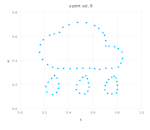

In [16]:
p = plot(x=B[1, :], y=B[2, :], Geom.point, themes[1],
         Guide.title("a point set, B"), themes[1],
         Coord.cartesian(fixed=true),
    )

In [17]:
draw(PNG("ptset_B.png", 5inch, 4inch, dpi=300), p)

In [3]:
rotation_matrix2d(θ::Float64) = [cos(θ) -sin(θ); sin(θ) cos(θ)]

rotation_matrix2d (generic function with 1 method)

In [4]:
θ = π / 6
R_known = rotation_matrix2d(θ)

2×2 Array{Float64,2}:
 0.866025  -0.5     
 0.5        0.866025

In [5]:
ϵ = 0.01 # noise
A = R_known  * B .+ ϵ * randn(size(B)...)

2×70 Array{Float64,2}:
 0.0753073  0.0218006  -0.0452765  -0.121379  …  0.606697  0.559325  0.538039
 0.44479    0.393577    0.447545    0.48603      0.588557  0.595076  0.615859

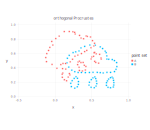

In [6]:
p = plot(layer(x=A[1, :], y=A[2, :], Geom.point, themes[3]),                            
         layer(x=B[1, :], y=B[2, :], Geom.point, themes[1]),    
         Guide.title("orthogonal Procrustes"), themes[1],
         Coord.cartesian(fixed=true),
         Guide.manual_color_key("point set", ["A", "B"], [color_palette[3], color_palette[1]])
    )  

In [7]:
draw(PNG("before_alignment.png", 5inch, 4inch, dpi=300), p)

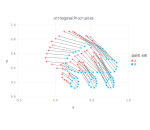

In [8]:
p = plot(layer(x=A[1, :], y=A[2, :], Geom.point, themes[3]),                            
         layer(x=B[1, :], y=B[2, :], Geom.point, themes[1]),
         [layer(x=[A[1, i], B[1, i]], y=[A[2, i], B[2, i]], 
            Geom.line, Theme(default_color=colorant"gray")) for i = 1:size(A)[2]]...,
         Guide.title("orthogonal Procrustes"), themes[1],
         Coord.cartesian(fixed=true),
         Guide.manual_color_key("point set", ["A", "B"], [color_palette[3], color_palette[1]])
    )  

In [9]:
draw(PNG("correspondence.png", 5inch, 4inch, dpi=300), p)

In [10]:
F = svd(B * A')

SVD{Float64,Float64,Array{Float64,2}}([-0.846431 -0.532498; -0.532498 0.846431], [30.883, 2.66728], [-0.465778 -0.884902; -0.884902 0.465778])

In [11]:
R = F.U * F.Vt
A_transformed = R * A

2×70 Array{Float64,2}:
 0.288007  0.216043  0.185027  0.138444  …  0.819928  0.782195  0.774185
 0.347219  0.329702  0.410014  0.481447     0.205426  0.234801  0.263451

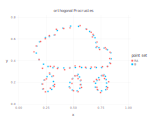

In [12]:
p = plot(layer(x=A_transformed[1, :], y=A_transformed[2, :], Geom.point, themes[3]),                            
         layer(x=B[1, :], y=B[2, :], Geom.point, themes[1]),    
         Guide.title("orthogonal Procrustes"), themes[1],
         Coord.cartesian(fixed=true),
         Guide.manual_color_key("point set", ["RA", "B"], [color_palette[3], color_palette[1]])
    ) 

In [13]:
draw(PNG("after_alignment.png", 5inch, 4inch, dpi=300), p)